# Pymaceuticals Inc.
---

### Analysis

From the summary, Capomulin and Ramicane were most effective in shrinking tumors. These treatments were also the most tested. 
    The gender distribution was nearly equal, with males and females each around half. 
Quartiles and boxplots suggest Ramicane may have slightly better results than Capomulin. A specific mouse treated with Capomulin showed tumor growth until day 20, then shrinkage for 15 days before growing again. Longer tests are needed.
A scatter plot with linear regression indicates a positive relationship between mouse weight and tumor size, suggesting larger mice tend to have larger tumors.

Three Conclusions:

1.Capomulin and Ramicane had the greatest impact on reducing tumor size. a. It would appear that it takes about 20 days to take effect b. Possibly the drug effect starts to become non-effective after 35 days.
2.The weight of the mouse seemed to impact the volume of tumor. (larger mice have more tumor volume).
3.Ramicane might be slightly better than Capomulin based upon the box plot.


In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the data table for preview


In [35]:
# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Review the information on the newly created merged dataframe
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice.
mice_count = mouse_metadata['Mouse ID'].nunique()
mice_count

249

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse


array(['g989'], dtype=object)

In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_data = combined_data[combined_data['Mouse ID'] == 'g989']
#Display the clean_data
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [39]:
mice_clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
mice_clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
# Checking the number of mice in the clean DataFrame.
mice_clean_count = mice_clean_data['Mouse ID'].nunique()
mice_clean_count

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = mice_clean_data.groupby('Drug Regimen')
drug_regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    #drug_group_stats = drug_grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = drug_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = drug_regimen['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = drug_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = drug_regimen['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})
# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
drug_regimen_summary_agg = mice_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
)
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_summary_agg.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], drug_regimen_summary_agg.columns])

drug_regimen_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

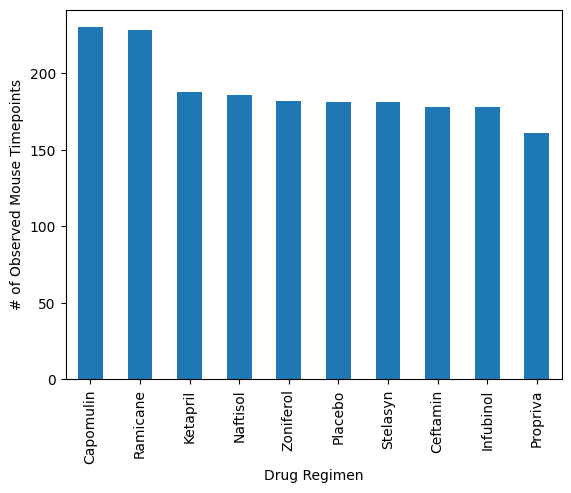

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas. 
#total_per_regimen = mice_clean_data.groupby('Drug Regimen').count()['Mouse ID'].sort_values(ascending=False)
#total_per_regimen.plot(kind='bar')
#plt.xlabel('Drug Regimen')
#plt.ylabel('# of Observed Mouse Timepoints')
#plt.show()
pandas_drugs = combined_data.groupby(["Drug Regimen"])["Timepoint"].count()
pandas_drugs.sort_values(ascending=False).plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")



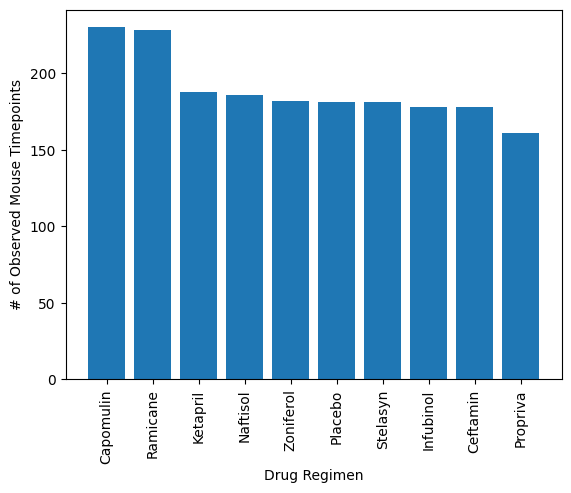

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts_regimen = combined_data['Drug Regimen'].value_counts()
#combined_data['Drug Regimen'].value_counts()
plt.bar(counts_regimen.index, counts_regimen.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()
# Save the figure


In [45]:
counts_regimen = combined_data['Drug Regimen'].value_counts()
combined_data['Drug Regimen'].value_counts()

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: count, dtype: int64

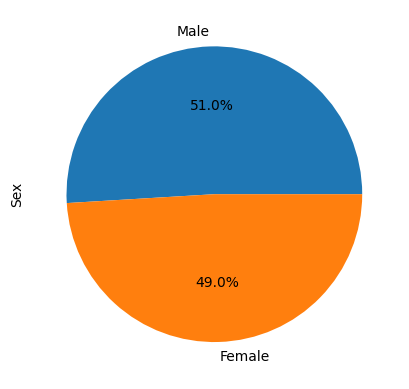

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
MF_distribution = mice_clean_data['Sex'].value_counts()
MF_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

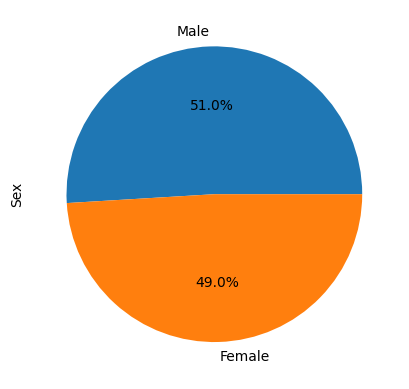

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = MF_distribution.index
sizes = MF_distribution.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_data = mice_clean_data[mice_clean_data['Drug Regimen'].isin(treatments)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = treatment_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, treatment_data, on=['Mouse ID', 'Timepoint'], how='left')
# Filter the cleaned data for the four treatment regimens
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
 # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


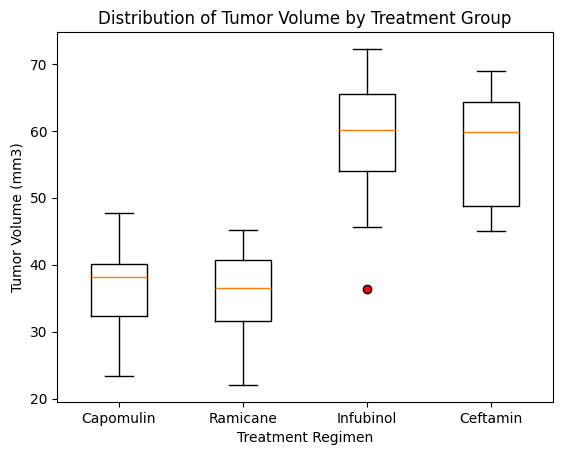

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red'))

# Set the title and labels
plt.title("Distribution of Tumor Volume by Treatment Group")
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")

# Add red markers for potential outliers
for i in range(len(outliers)):
    x = [i + 1] * len(outliers[i])
    plt.plot(x, outliers[i], 'ro')

# Display the plot
plt.show()

## Line and Scatter Plots

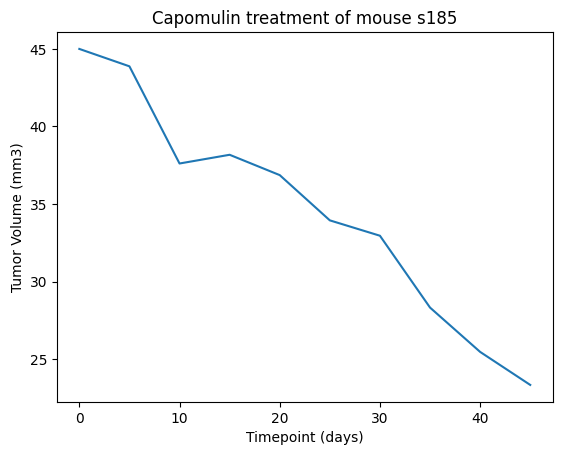

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = mice_clean_data.loc[(mice_clean_data['Drug Regimen'] == 'Capomulin') & (mice_clean_data['Mouse ID'] == 's185')]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse s185')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

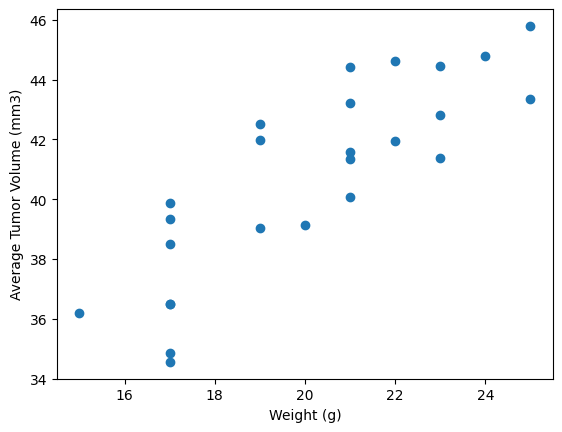

In [52]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mice_clean_data[mice_clean_data['Drug Regimen'] == 'Capomulin']
capomulin_data = capomulin_data[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
avg_tumor_vol_per_mouse = capomulin_data.groupby('Mouse ID').mean()
plt.scatter(avg_tumor_vol_per_mouse['Weight (g)'], avg_tumor_vol_per_mouse['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


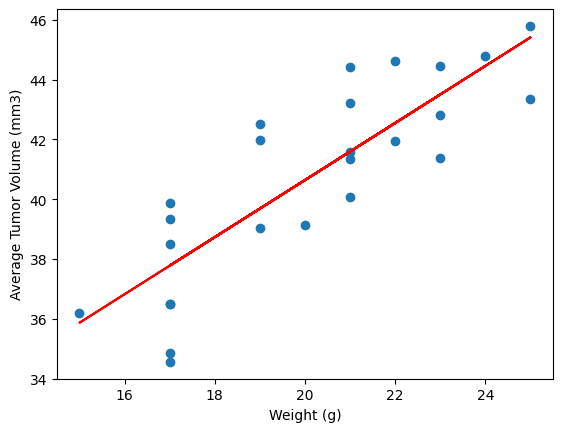

In [53]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

capomulin_avg = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
correlation = st.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])[0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
regress_values = capomulin_avg['Weight (g)'] * slope + intercept

print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'], regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()